In [1]:
import os
import pandas as pd
article_path = os.path.expanduser('~/data/datasets/HMRecommendation/articles.csv')
customer_path = os.path.expanduser('~/data/datasets/HMRecommendation/customers.csv')
transaction_path = os.path.expanduser('~/data/datasets/HMRecommendation/transactions_train.csv')

articles = pd.read_csv(article_path, dtype=str)

# add path to the articles
im_path = []
im_root = os.path.expanduser('~/data/datasets/HMRecommendation/')
base_path = 'images'
for i,a in articles.iterrows():
    folder = a['article_id'][:3]
    file_name = a['article_id'] + '.jpg'
    path = os.path.join(im_root,base_path, folder, file_name)
    im_path.append(path)
articles['path'] = im_path

# only keep the article that has associated image
articles = articles[articles['path'].apply(os.path.exists)]

In [2]:
num_set = set(articles['product_type_no'])
names = set(articles['product_type_name'])
name_dict = dict()
for num,name in zip(articles['product_type_no'], articles['product_type_name']):
    if num not in name_dict:
        name_dict[num]=name
    else:
        if(name_dict[num]!=name):
            print('wrong')
print(name_dict)

{'253': 'Vest top', '306': 'Bra', '304': 'Underwear Tights', '302': 'Socks', '273': 'Leggings/Tights', '252': 'Sweater', '254': 'Top', '272': 'Trousers', '72': 'Hair clip', '532': 'Umbrella', '295': 'Pyjama jumpsuit/playsuit', '256': 'Bodysuit', '73': 'Hair string', '-1': 'Unknown', '308': 'Hoodie', '196': 'Sleep Bag', '74': 'Hair/alice band', '67': 'Belt', '87': 'Boots', '298': 'Bikini top', '59': 'Swimwear bottom', '286': 'Underwear bottom', '57': 'Swimsuit', '275': 'Skirt', '255': 'T-shirt', '265': 'Dress', '75': 'Hat/beanie', '307': 'Kids Underwear top', '274': 'Shorts', '259': 'Shirt', '69': 'Cap/peaked', '297': 'Pyjama set', '94': 'Sneakers', '81': 'Sunglasses', '245': 'Cardigan', '71': 'Gloves', '70': 'Earring', '66': 'Bag', '264': 'Blazer', '89': 'Other shoe', '267': 'Jumpsuit/Playsuit', '91': 'Sandals', '262': 'Jacket', '83': 'Umbrella', '277': 'Costumes', '305': 'Robe', '80': 'Scarf', '263': 'Coat', '78': 'Other accessories', '257': 'Polo shirt', '93': 'Slippers', '293': 'Nig

In [3]:
num_dict = dict()
for i in range(len(articles)):
    type_num = articles['product_type_no'].iloc[i]
    if type_num not in num_dict:
        num_dict[type_num] = 1
    else:
        num_dict[type_num] += 1


In [37]:
import matplotlib.pyplot as plt
import numpy as np
def draw_chart_mul_h_sorted(names, stats, dataset_name, figure_name=None):
    row_num = 1
    col_num = 1
    fig, plots = plt.subplots(nrows=row_num, ncols=col_num, figsize=(32, 24))
    colors = plt.rcParams["axes.prop_cycle"]()
    colors = [next(colors)["color"] for i in range(len(stats))]
    width = 1.0/len(stats)
    #width = 0.7/len(stats)
    
    count = 0
    x_range = np.arange(len(names))

    #for i, row in enumerate(plots):
        #for j, ax in enumerate(row):
    ax = plots
    #ind_order = np.argsort(stats_batch[0][count])
    ind_order = np.argsort(stats)
    stat = stats[ind_order]

    #ax.barh(x_range, stat,height=width,facecolor=colors[0])
    bars = ax.barh(x_range, stat,facecolor=colors[0])
    ax.bar_label(bars)
    ax.set_ylabel('category')
    ax.set_xlabel('number')
    
    ax.set_title('statics for {}'.format(dataset_name))
    ax.set_yticks(x_range)
    ax.set_yticklabels([names[ind] for ind in ind_order], rotation=0)                
    count += 1
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    #plt.show()
    if figure_name is not None:
        plt.savefig(figure_name,dpi=300)

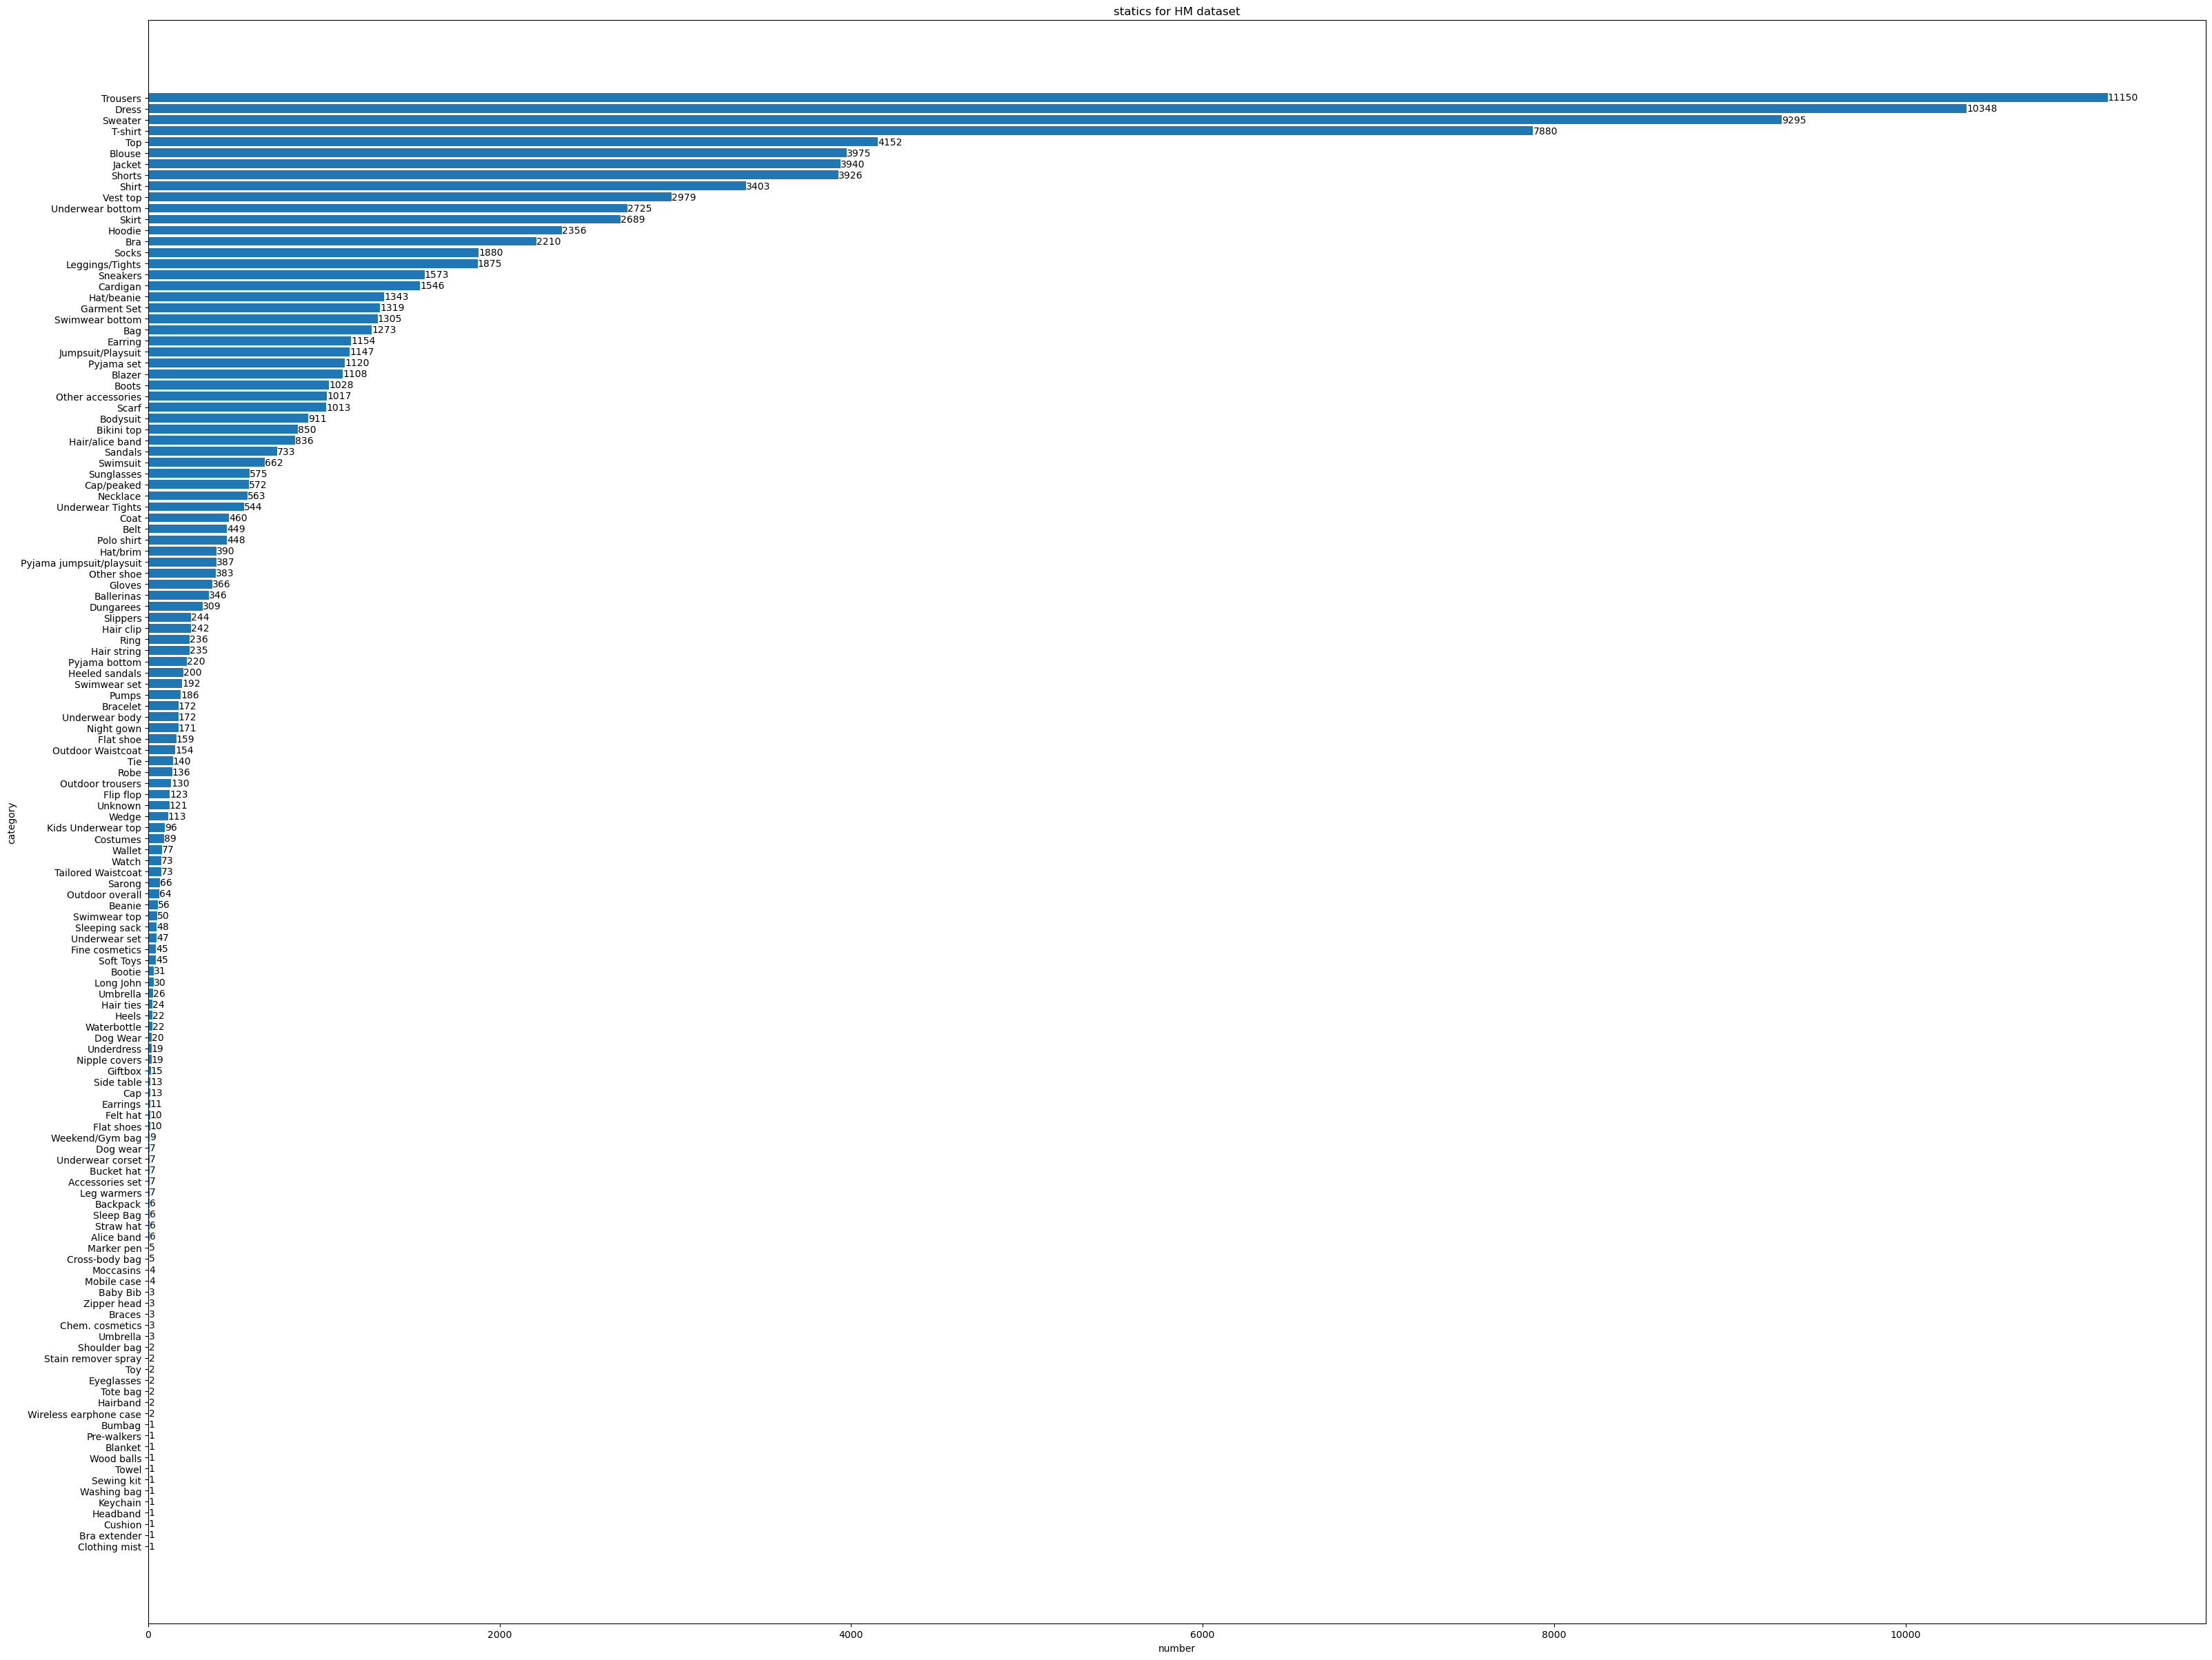

In [38]:
#names = list(num_dict.keys())
names = [name_dict[k] for k in num_dict.keys()]
vals = np.array(list(num_dict.values()))


draw_chart_mul_h_sorted(names,vals,'HM dataset')

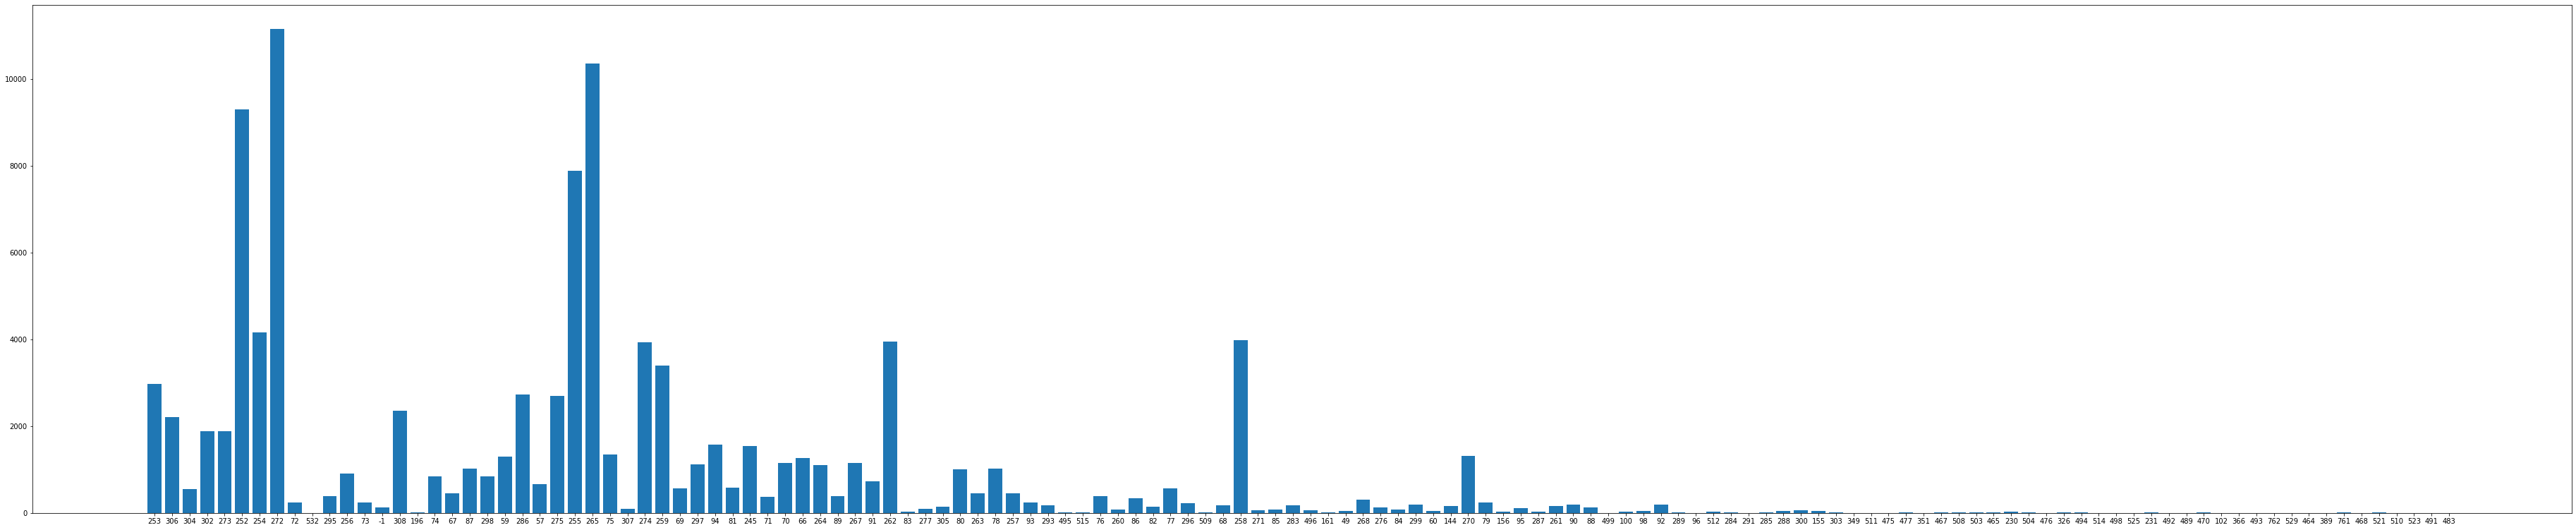

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(50,10))
ax = fig.add_axes([0,0,1,1])
names = num_dict.keys()
vals = num_dict.values()
ax.bar(names,vals)
plt.show()